# Описание

Применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.io as pio
import plotly.subplots as sp
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

# установка отображения графиков в Jupyter Notebook
pio.renderers.default = "notebook"

# константы
RANDOM_STATE = 42

## Этап 1. Получение и загрузка данных

In [2]:
# Загрузка данных
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseVal"] = data.target

## Этап 2. Проверка данных на наличие пропусков

In [3]:
# Проверка на пропуски
print(df.isnull().sum())

# В данном случае пропуски не обнаружены, так что шаг с удалением пропусков пропускается.

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


## Этап 3. Разделение на выборки

In [4]:
# Разделение данных
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

## Этап 4. Обучение модели линейной регрессии. Метрики, графики.

In [5]:
# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вычисление метрик
rmse_train = round(root_mean_squared_error(y_train, y_train_pred), 2)
r2_train = round(r2_score(y_train, y_train_pred), 2)
rmse_test = round(root_mean_squared_error(y_test, y_test_pred), 2)
r2_test = round(r2_score(y_test, y_test_pred), 2)

print(f"RMSE (train): {rmse_train}, R2 (train): {r2_train}")
print(f"RMSE (test): {rmse_test}, R2 (test): {r2_test}")

RMSE (train): 0.72, R2 (train): 0.61
RMSE (test): 0.75, R2 (test): 0.58


In [6]:
def create_comparison_plot(y_train, y_train_pred, y_test, y_test_pred):
    """
    Функция для создания подграфиков для сравнения реальных и предсказанных значений для тренировочной и тестовой выборок
    :param y_train: реальные значения на тренировочной выборке
    :param y_train_pred: предсказанные значения на тренировочной выборке
    :param y_test: реальные значения на тестовой выборке
    :param y_test_pred: предсказанные значения на тестовой выборке
    """

    # Создаем подграфики
    fig = sp.make_subplots(
        rows=1,
        cols=2,
        subplot_titles=(
            "Тренировочная выборка: Реальные vs Предсказанные значения",
            "Тестовая выборка: Реальные vs Предсказанные значения",
        ),
    )

    # Визуализация для тренировочной выборки
    scatter_train = go.Scatter(
        x=y_train,
        y=y_train_pred,
        mode="markers",
        opacity=0.5,
        marker=dict(color="white"),
        name="Предсказанные значения (Тренировочная выборка)",
    )

    # Диагональная линия
    line_train = go.Scatter(
        x=[y_train.min(), y_train.max()],
        y=[y_train.min(), y_train.max()],
        mode="lines",
        line=dict(color="yellow", dash="dash"),
        name="Идеальная линия",
    )

    # Добавляем трассы на подграфик
    fig.add_trace(scatter_train, row=1, col=1)
    fig.add_trace(line_train, row=1, col=1)

    # Визуализация для тестовой выборки
    scatter_test = go.Scatter(
        x=y_test,
        y=y_test_pred,
        mode="markers",
        opacity=0.5,
        marker=dict(color="red"),
        name="Предсказанные значения (Тестовая выборка)",
    )

    # Диагональная линия
    line_test = go.Scatter(
        x=[y_test.min(), y_test.max()],
        y=[y_test.min(), y_test.max()],
        mode="lines",
        line=dict(color="yellow", dash="dash"),
        name="Идеальная линия",
    )

    # Добавляем трассы на подграфик
    fig.add_trace(scatter_test, row=1, col=2)
    fig.add_trace(line_test, row=1, col=2)

    # Обновляем оси и заголовки
    fig["layout"]["xaxis1"].update(title="Реальные значения")
    fig["layout"]["yaxis1"].update(title="Предсказанные значения")
    fig["layout"]["xaxis2"].update(title="Реальные значения")
    fig["layout"]["yaxis2"].update(title="Предсказанные значения")

    fig.update_layout(
        title_text="Реальные vs Предсказанные значения для Тренировочной и Тестовой выборок",
        showlegend=False,
        template="plotly_dark",
        width=1200,
        height=550,
    )

    fig.show("png")

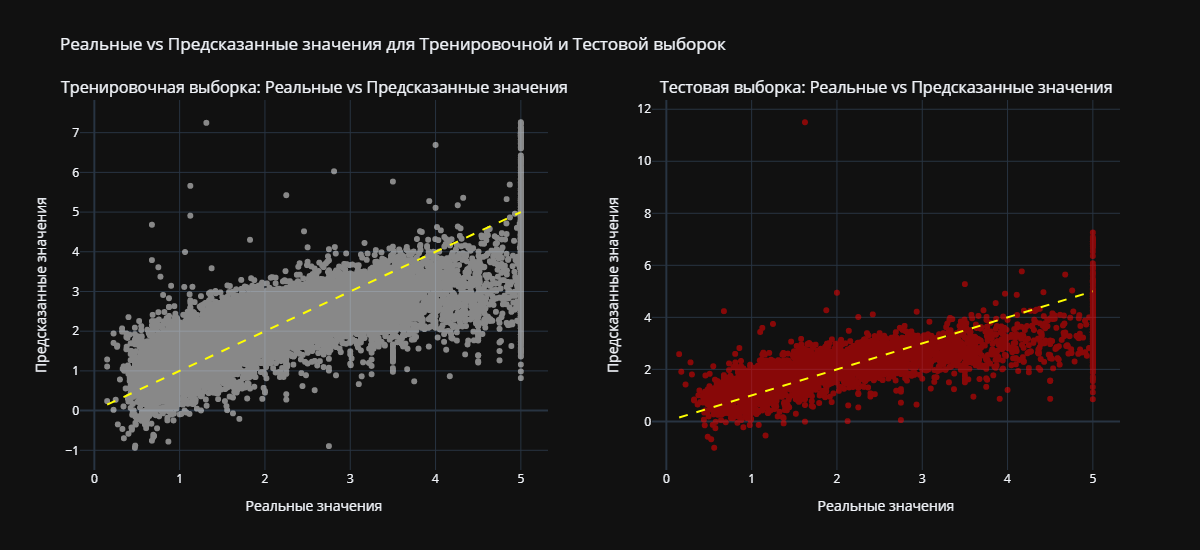

In [7]:
create_comparison_plot(y_train, y_train_pred, y_test, y_test_pred)

## Этап 5. График распределения целевой переменной.

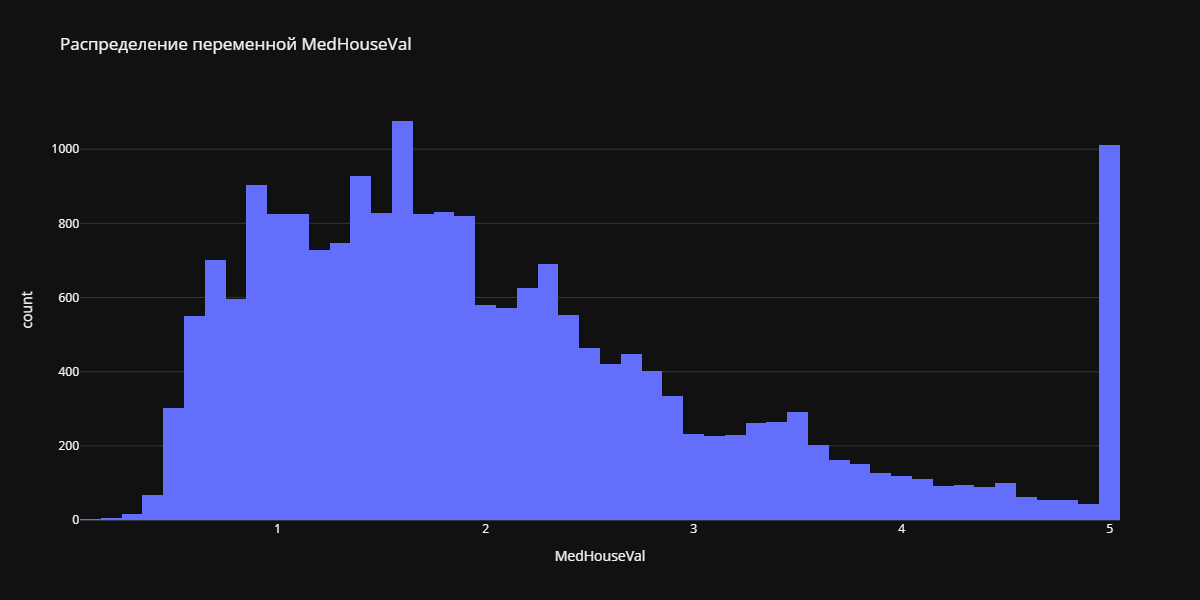

In [8]:
# График распределения целевой переменной
fig = px.histogram(
    df, x="MedHouseVal", nbins=50, title="Распределение переменной MedHouseVal"
)
fig.update_layout(template="plotly_dark", width=1200, height=600)
fig.show("png")

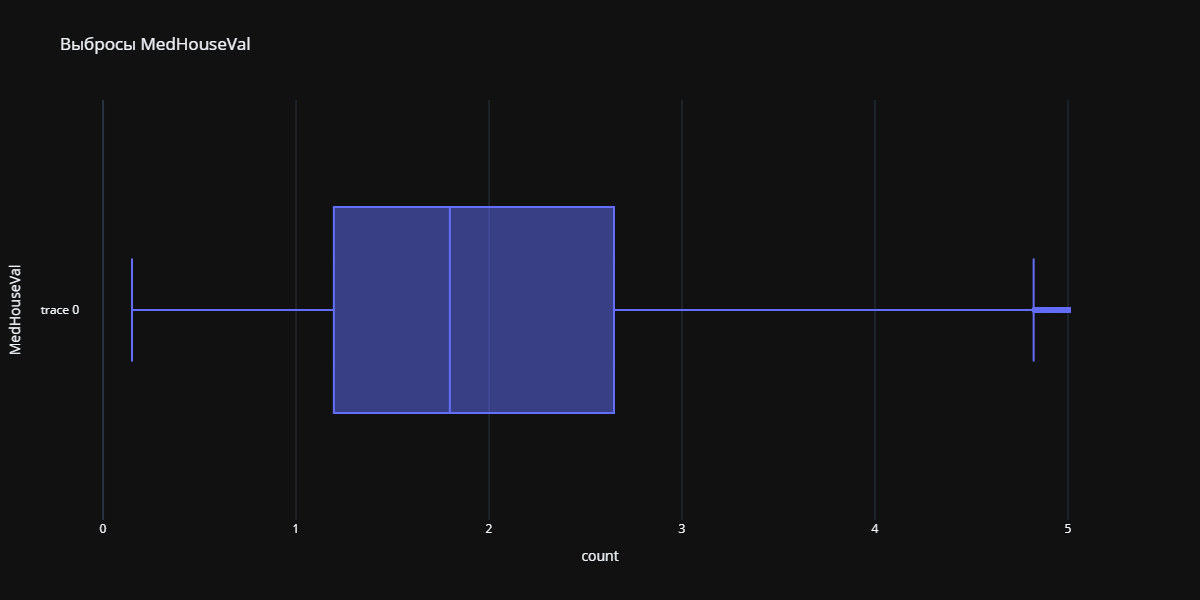

In [9]:
fig = go.Figure()

fig.add_trace(go.Box(x=df['MedHouseVal']))

fig.update_layout(
    title="Выбросы MedHouseVal",
    xaxis_title="count",
    yaxis_title="MedHouseVal",
    template="plotly_dark",
    width=1200,
    height=600,
)
fig.show("png")

Смотрим на график и убеждаемся в наличии незначительного кол-ва выбросов, которые таковыми не являются т.к. высокая стоимиость домов там обусловлена местоположением, а именно на берегу моря и рядом с заливом. Дома расположенные дальше от моря стоят соответствно дешевле.

## Этап 6. Матрица корреляции

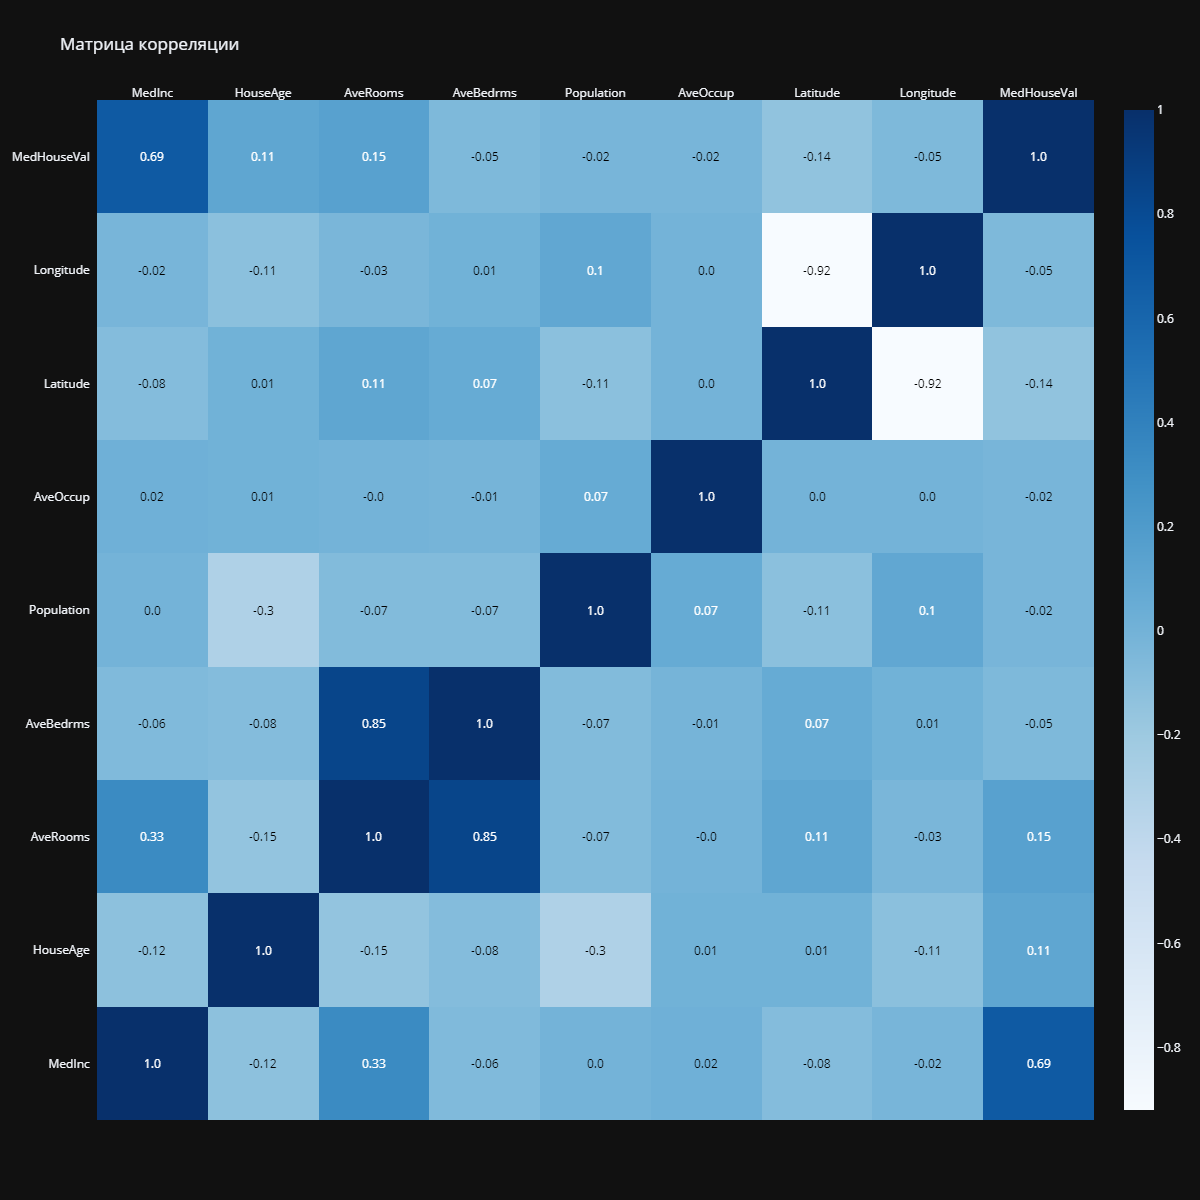

In [10]:
# Вычисление корреляционной матрицы и округление значений
corr_matrix = df.corr()
corr_matrix_rounded = corr_matrix.round(2)

# Извлечение данных для тепловой карты
z = corr_matrix_rounded.values
x = corr_matrix_rounded.columns.tolist()
y = x

# Создание аннотированной тепловой карты
fig = ff.create_annotated_heatmap(
    z,
    x=x,
    y=y,
    annotation_text=corr_matrix_rounded.values,
    colorscale="Blues",
    showscale=True,
)

# Обновление layout для задания ширины и высоты
fig.update_layout(
    title="Матрица корреляции", template="plotly_dark", width=1200, height=1200
)

fig.show("png")

### Выводы

Наблюдается сильная корреляция между средним доходом и средней стоимостью дома (~~Кэп~~). Координаты тоже сильно коррелируют, как ни странно. Ну и средние кол-ва комнат и спален (~~можно подумать~~), тоже перекликаются довольно серьезно.

### Удаление признаков с высокой корреляцией

In [11]:
high_corr_features = ["Latitude", "AveBedrms"]
df_corr = df.drop(columns=high_corr_features)

## Подготовка выборок и обучение модели

In [12]:
X_corr = df_corr.drop("MedHouseVal", axis=1)
y_corr = df_corr["MedHouseVal"]
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(
    X_corr, y_corr, test_size=0.2, random_state=RANDOM_STATE
)

# Обучение модели
model_corr = LinearRegression()
model_corr.fit(X_train_corr, y_train_corr)

# Предсказания
y_train_corr_pred = model_corr.predict(X_train_corr)
y_test_corr_pred = model_corr.predict(X_test_corr)

# Вычисление метрик
rmse_train_corr = round(root_mean_squared_error(y_train_corr, y_train_corr_pred), 2)
r2_train_corr = round(r2_score(y_train_corr, y_train_corr_pred), 2)
rmse_test_corr = round(root_mean_squared_error(y_test_corr, y_test_corr_pred), 2)
r2_test_corr = round(r2_score(y_test_corr, y_test_corr_pred), 2)

print(f"RMSE (train, corr): {rmse_train_corr}, R2 (train, corr): {r2_train_corr}")
print(f"RMSE (test, corr): {rmse_test_corr}, R2 (test, corr): {r2_test_corr}")

RMSE (train, corr): 0.8, R2 (train, corr): 0.52
RMSE (test, corr): 0.81, R2 (test, corr): 0.5


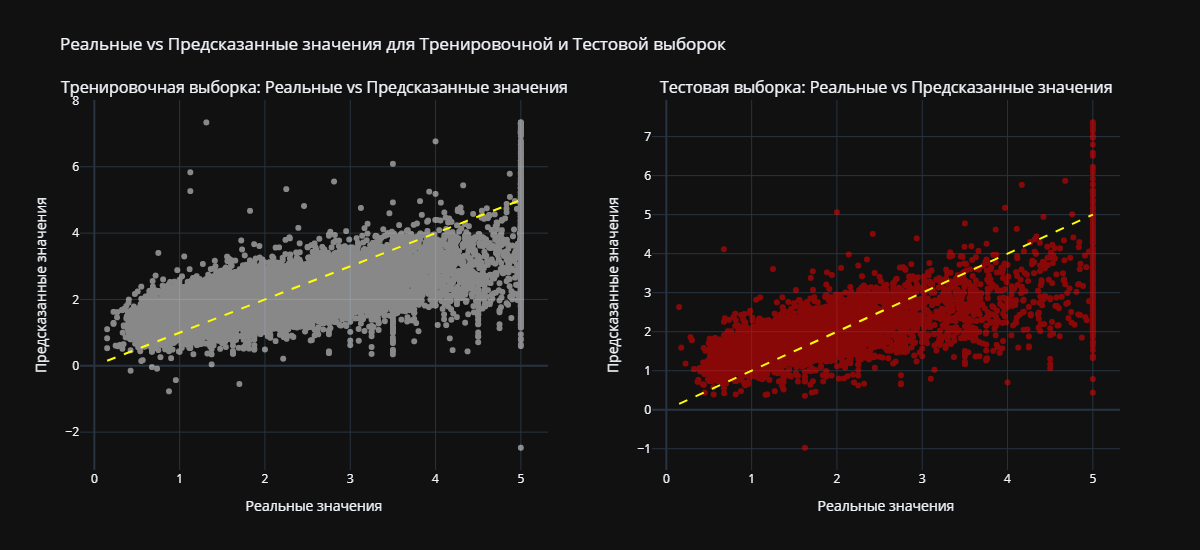

In [13]:
create_comparison_plot(y_train_corr, y_train_corr_pred, y_test_corr, y_test_corr_pred)

In [14]:
df_outliers = df_corr.copy()

## Этап 7. Исследование на предмет нахождения выбросов

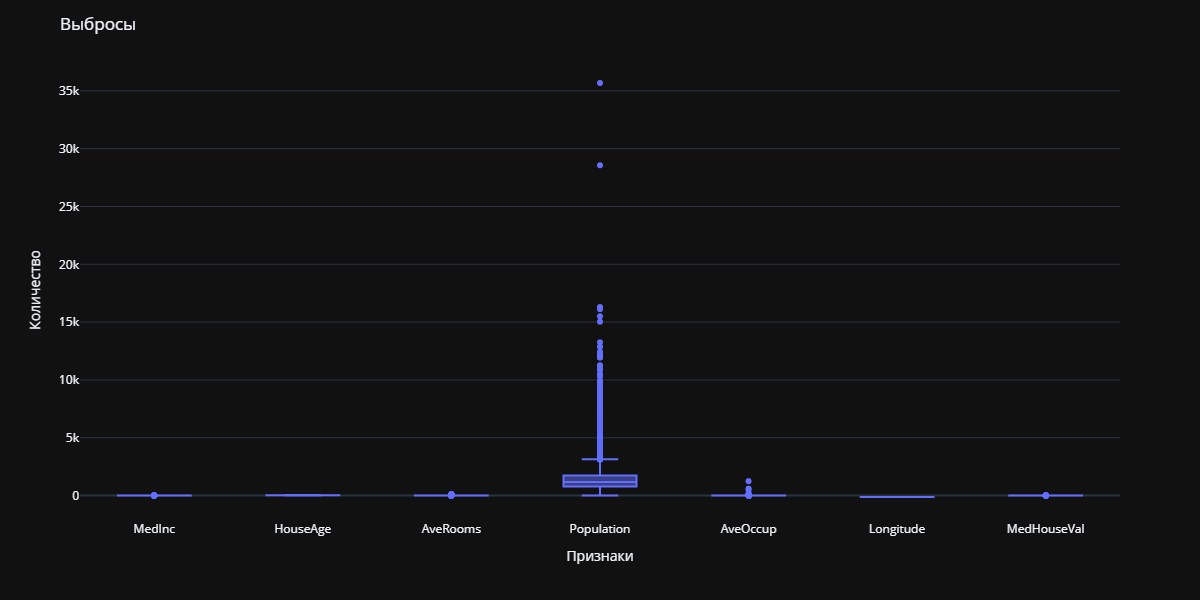

In [15]:
# Просмотр выбросов через графики Box Plot
fig_outliers = px.box(df_outliers, y=df_outliers.columns)
fig_outliers.update_layout(
    title="Выбросы",
    xaxis_title="Признаки",
    yaxis_title="Количество",
    template="plotly_dark",
    width=1200,
    height=600,
)
fig_outliers.show("png")

### Удаление выбросов

In [16]:
# Удаление выбросов
def remove_outliers_iqr(df, target_column, columns_to_clean):
    # Копируем DataFrame, чтобы избежать изменения оригинальных данных
    df_copy = df.copy()

    # Проверяем, что все указанные столбцы являются числовыми
    for column in columns_to_clean:
        if column not in df_copy.columns or not np.issubdtype(
            df_copy[column].dtype, np.number
        ):
            raise ValueError(
                f"Столбец '{column}' не существует или не является числовым."
            )

    for column in columns_to_clean:
        # Рассчитываем первый и третий квартили (Q1 и Q3)
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)

        # Рассчитываем межквартильный размах (IQR)
        IQR = Q3 - Q1

        # Определяем нижнюю и верхнюю границы
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Фильтруем DataFrame, исключая выбросы
        df_copy = df_copy[
            (df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)
        ]

    return df_copy


# Применяем
columns_to_clean = ["Population"]
df_outliers_clean = remove_outliers_iqr(
    df_outliers, target_column="MedHouseVal", columns_to_clean=columns_to_clean
)

### Повторение пп.3-4

In [17]:
# Повторное разделение данных после удаления выбросов
X_outliers_clean = df_outliers_clean.drop("MedHouseVal", axis=1)
y_outliers_clean = df_outliers_clean["MedHouseVal"]
(
    X_train_outliers_clean,
    X_test_outliers_clean,
    y_train_outliers_clean,
    y_test_outliers_clean,
) = train_test_split(
    X_outliers_clean, y_outliers_clean, test_size=0.2, random_state=RANDOM_STATE
)

# Обучение модели
model_outliers_clean = LinearRegression()
model_outliers_clean.fit(X_train_outliers_clean, y_train_outliers_clean)

# Предсказания
y_train_outliers_clean_pred = model_outliers_clean.predict(X_train_outliers_clean)
y_test_outliers_clean_pred = model_outliers_clean.predict(X_test_outliers_clean)

# Вычисление метрик
rmse_train_outliers_clean = round(
    root_mean_squared_error(y_train_outliers_clean, y_train_outliers_clean_pred), 2
)
r2_train_outliers_clean = round(
    r2_score(y_train_outliers_clean, y_train_outliers_clean_pred), 2
)
rmse_test_outliers_clean = round(
    root_mean_squared_error(y_test_outliers_clean, y_test_outliers_clean_pred), 2
)
r2_test_outliers_clean = round(
    r2_score(y_test_outliers_clean, y_test_outliers_clean_pred), 2
)

print(
    f"RMSE (train, outliers clean): {rmse_train_outliers_clean}, R2 (train, outliers clean): {r2_train_outliers_clean}"
)
print(
    f"RMSE (test, outliers clean): {rmse_test_outliers_clean}, R2 (test, outliers clean): {r2_test_outliers_clean}"
)

RMSE (train, outliers clean): 0.78, R2 (train, outliers clean): 0.56
RMSE (test, outliers clean): 0.86, R2 (test, outliers clean): 0.44


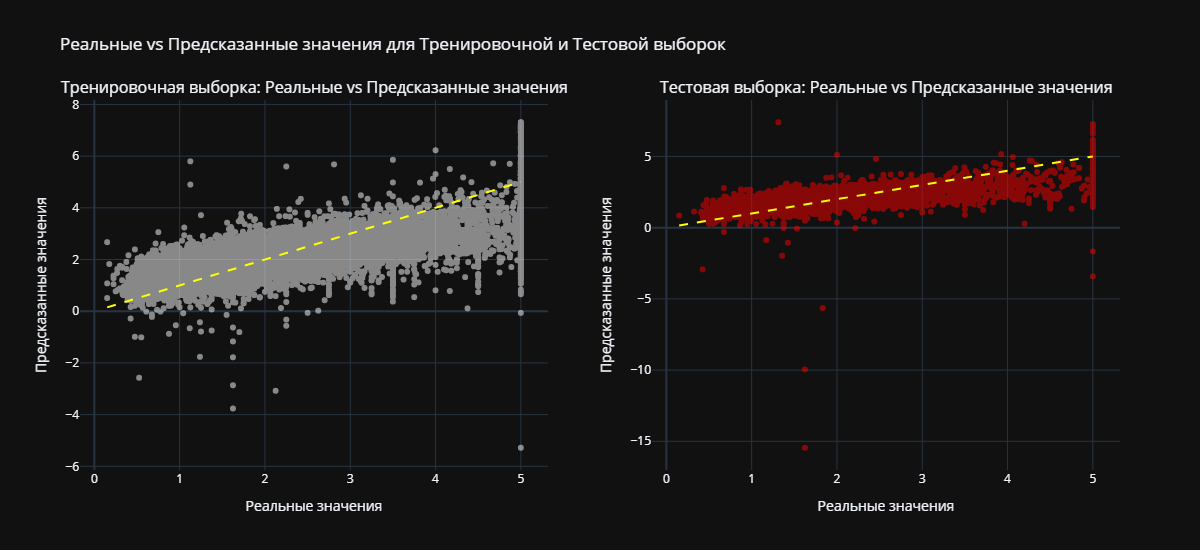

In [18]:
create_comparison_plot(
    y_train_outliers_clean,
    y_train_outliers_clean_pred,
    y_test_outliers_clean,
    y_test_outliers_clean_pred,
)

## Этап 8. Математические изменения признаков.

In [19]:
df_transformed = df_outliers_clean.copy()


# Математические преобразования признаков

df_transformed["MedInc"] = np.log(df_transformed["MedInc"])
df_transformed["HouseAge"] = np.square(df_transformed["HouseAge"])
df_transformed["AveRooms"] = np.square(df_transformed["AveRooms"])
df_transformed["Population"] = np.sqrt(df_transformed["Population"])
df_transformed["AveOccup"] = np.square(df_transformed["AveOccup"])


### Повторение пп.3-4

In [20]:
# Повторное разделение данных
X_transformed = df_transformed.drop("MedHouseVal", axis=1)
y_transformed = df_transformed["MedHouseVal"]
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = (
    train_test_split(
        X_transformed, y_transformed, test_size=0.2, random_state=RANDOM_STATE
    )
)

# Обучение модели
model_transformed = LinearRegression()
model_transformed.fit(X_train_transformed, y_train_transformed)

# Предсказания
y_train_transformed_pred = model_transformed.predict(X_train_transformed)
y_test_transformed_pred = model_transformed.predict(X_test_transformed)

# Вычисление метрик
rmse_train_transformed = round(
    root_mean_squared_error(y_train_transformed, y_train_transformed_pred), 2
)
r2_train_transformed = round(r2_score(y_train_transformed, y_train_transformed_pred), 2)
rmse_test_transformed = round(
    root_mean_squared_error(y_test_transformed, y_test_transformed_pred), 2
)
r2_test_transformed = round(r2_score(y_test_transformed, y_test_transformed_pred), 2)

print(
    f"RMSE (train, transformed): {rmse_train_transformed}, R2 (train, transformed): {r2_train_transformed}"
)
print(
    f"RMSE (test, transformed): {rmse_test_transformed}, R2 (test, transformed): {r2_test_transformed}"
)

RMSE (train, transformed): 0.85, R2 (train, transformed): 0.48
RMSE (test, transformed): 0.89, R2 (test, transformed): 0.4


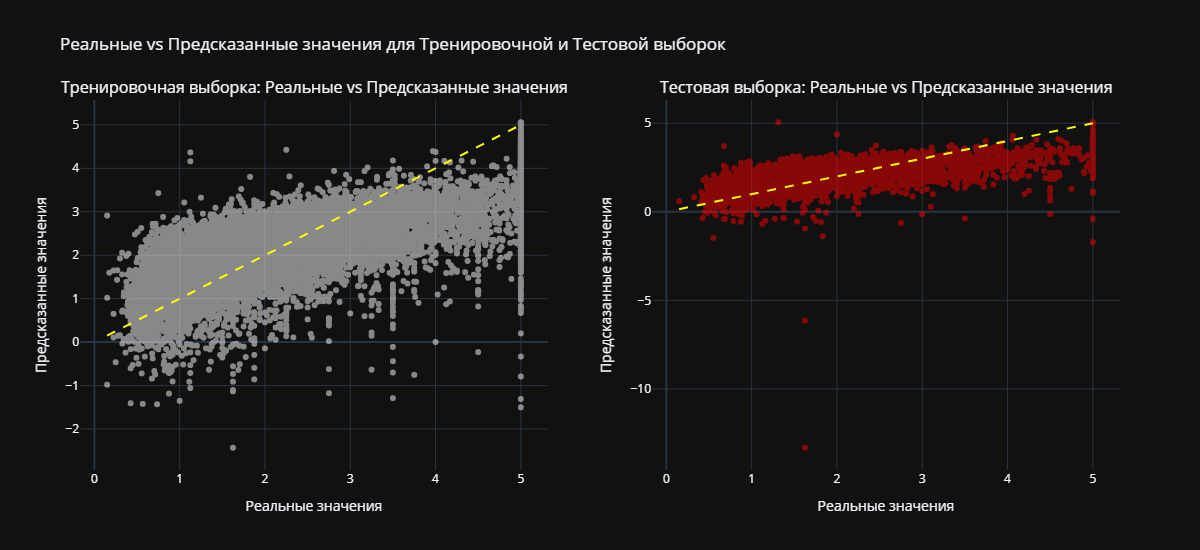

In [21]:
create_comparison_plot(
    y_train_transformed,
    y_train_transformed_pred,
    y_test_transformed,
    y_test_transformed_pred,
)

# Вывод
- Обучены четыре модели:
  1. Базовая модель на всех признаках.
  2. Модель после удаления признаков с высокой корреляцией.
  3. Модель после удаления выбросов.
  4. Модель с математическими преобразованиями признаков.

- Преобразования данных:
  1. Удаление признаков с высокой корреляцией
  2. Удаление выбросов.
  3. Применение логарифма, квадратного корня и возведения в квадрат к различным признакам.

- Сравнение метрик моделей:
  | Модель                  | RMSE (Train) | R² (Train) | RMSE (Test) | R² (Test) | Признаки и преобразования                                                      |
  |-------------------------|--------------|------------|-------------|-----------|---------------------------------------------------------------------------------|
  | Базовая модель          | 0.72          | 0.61        | 0.75         | 0.58       | Все признаки без изменений                                                      |
  | Модель после удаления признаков с высокой корреляцией | 0.8          | 0.52        | 0.81         | 0.5       | Признаки после удаления высококоррелированных                         |
  | Модель после удаления выбросов   | 0.78          | 0.56        | 0.86         | 0.44       | Признаки после удаления выбросов                                                |
  | Модель с математическими преобразованиями признаков| 0.85          | 0.48        | 0.89         | 0.4       | МедИнк (Log), HouseAge, AveRooms, AveOccup (Squared), Population (Sqrt) и оставшиеся признаки без изменений |



- Общий вывод: Математические преобразования и удаление выбросов позволили улучшить метрики модели, что свидетельствует о важности разведочного анализа данных и корректной предобработки данных перед обучением моделей машинного обучения. Метрики улучшались после каждого метода предобработки данных.